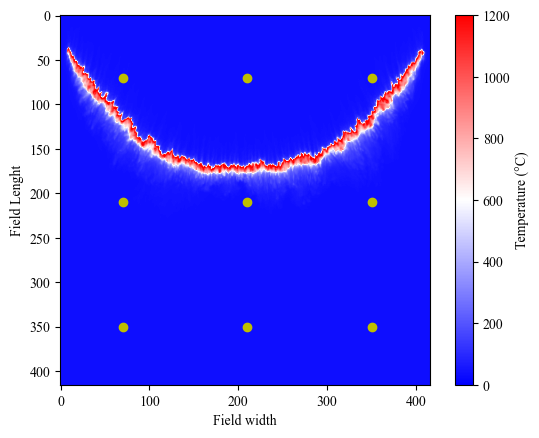

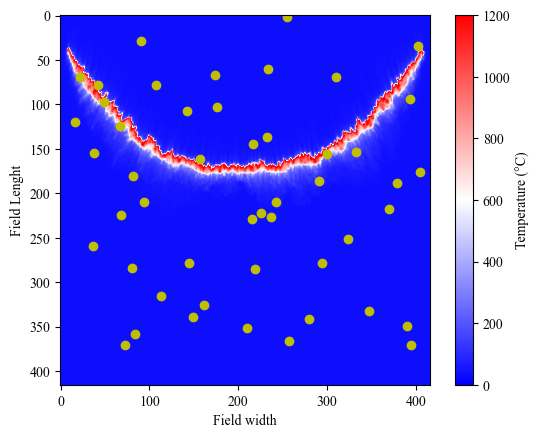

Text(0.5, 1.0, 'Stratified Random Sampling')

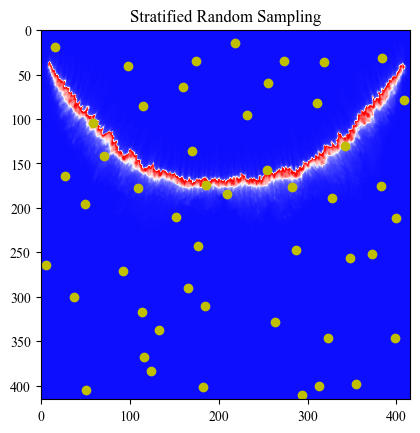

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Assume wind_map is a 416x416 numpy array representing the wind map
i=14
wind_map=np.array(np.load(f"/home/availab-dl1/Sandboxes/Mohammad/FireWind-Dataset/FireWind_highres/X_train/{i}.npy"))[4]
fourth_channel=wind_map
extract_points=[70,210,350] #Assuming 5 by 5 grid of UAVs
#extract_points=[41, 124, 207, 291, 375] #Assuming 5 by 5 grid of UAVs
#extract_points=[29, 90, 150, 210, 270, 330, 387] #Assuming a 7 by 7 grid of UAVs
# extract_points=[19, 61, 102, 143, 184, 224, 265, 307, 348, 389] #Assuming a 10 by 10 grid of UAVs


# Regular Grid Sampling
def regular_grid_sampling(extract_points):

    sampled_points = [(i, j) for i in np.array(extract_points)
                                for j in np.array(extract_points)]
    return sampled_points[:num_points]

# Random Sampling
power=0
prob_distribution=abs(fourth_channel)**power   
prob_distribution/=np.sum(prob_distribution) #normalise

def random_sampling(wind_map, num_points ,prob_distribution):
    sampled_points = np.random.choice(wind_map.size, num_points, replace=False, p=prob_distribution.flatten())
    return [(pt // wind_map.shape[1], pt % wind_map.shape[1]) for pt in sampled_points]

# Stratified Random Sampling
def stratified_random_sampling(wind_map, num_points):
    grid_size = int(np.sqrt(num_points))
    step = wind_map.shape[0] // grid_size
    sampled_points = []
    for i in range(grid_size):
        for j in range(grid_size):
            x = np.random.randint(i * step, (i + 1) * step)
            y = np.random.randint(j * step, (j + 1) * step)
            sampled_points.append((x, y))
    return sampled_points

# Example usage:
num_points=49
regular_samples = regular_grid_sampling(extract_points)
random_samples = random_sampling(wind_map, num_points, prob_distribution)
stratified_samples = stratified_random_sampling(wind_map, num_points)

# Visualize the sampling
plt.rcParams["font.family"] = "Times New Roman"
plt.imshow(wind_map, cmap='bwr',vmin=0,vmax=1200)
for (x, y) in regular_samples:
    plt.plot(y, x, 'yo')
#plt.title('Regular Grid Sampling')
plt.xlabel('Field width')
plt.ylabel('Field Lenght')
plt.colorbar(label='Temperature (°C)')
plt.savefig(f'/home/availab-dl1/Downloads/regular_grid.png', dpi=140)
plt.show()


plt.imshow(wind_map, cmap='bwr',vmin=0,vmax=1200)
for (x, y) in random_samples:
    plt.plot(y, x, 'yo')
#plt.title('Random Sampling')
plt.xlabel('Field width')
plt.ylabel('Field Lenght')
plt.colorbar(label='Temperature (°C)')
plt.savefig(f'/home/availab-dl1/Downloads/random_sampling.png', dpi=140)
plt.show()


plt.imshow(wind_map, cmap='bwr',vmin=0,vmax=1200)
for (x, y) in stratified_samples:
    plt.plot(y, x, 'yo')
plt.title('Stratified Random Sampling')





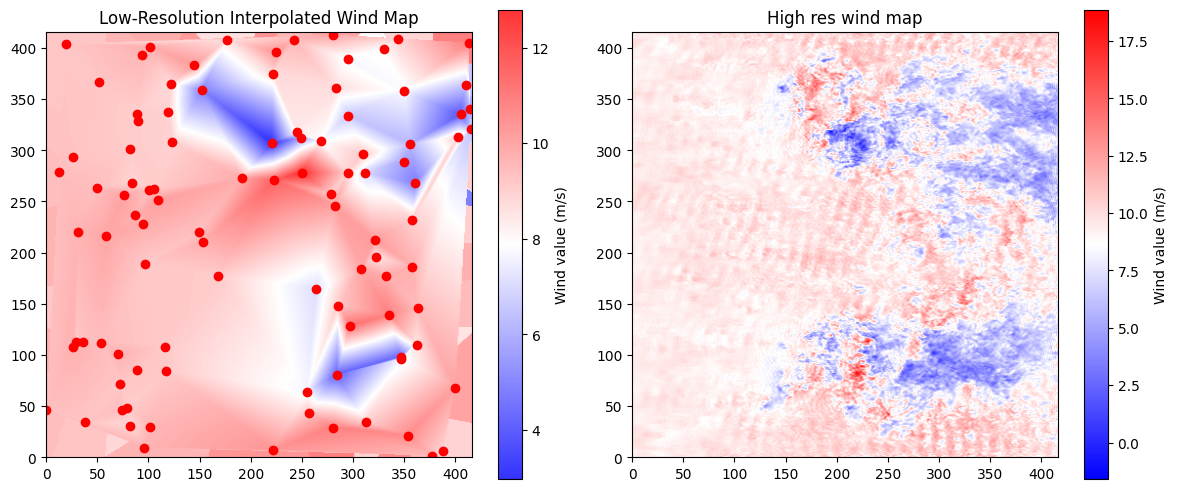

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import griddata

#importing wind map
i=10003
wind_map=np.array(np.load(f"/home/availab-dl1/Sandboxes/Mohammad/FireWind-Dataset/FireWind_highres/X_train/{i}.npy"))

# number of Sampled points 
num_points = 100

# Random sampling
def random_sampling(wind_map, num_points):
    sampled_points = np.random.choice(wind_map.size, size=num_points, replace=False)
    sampled_coords = [(pt // wind_map.shape[1], pt % wind_map.shape[1]) for pt in sampled_points]
    return np.array(sampled_coords)

# Perform random sampling once per file
sampling_coords = random_sampling(wind_map[0], num_points)
sampled_x = sampling_coords[:, 0]
sampled_y = sampling_coords[:, 1]

#Now lets build a meshgrid
grid_x, grid_y = np.mgrid[0:416:416j, 0:416:416j]

num_channel=4
low_res = np.zeros((num_channel, grid_x.shape[0], grid_y.shape[1]))

for channel in range(num_channel):
    sampled_values = wind_map[channel, sampled_x, sampled_y]

    # Interpolate the sampled points onto the grid using linear spline interpolation
    grid_z = griddata(sampling_coords, sampled_values, (grid_x, grid_y), method='linear')

    # Fill in any NaN values with the nearest neighbor interpolation (as a fallback)
    nan_mask = np.isnan(grid_z)
    if np.any(nan_mask):
        grid_z[nan_mask] = griddata(sampling_coords, sampled_values, (grid_x[nan_mask], grid_y[nan_mask]), method='nearest')

    low_res[channel] = grid_z



# Visualize the low-resolution interpolated wind map
plt.figure(figsize=(12, 5))
# Plot the interpolated values
plt.subplot(1, 2, 1)
plt.imshow(low_res[0].T, extent=(0, 416, 0, 416), origin='lower', cmap='bwr', alpha=0.8)
plt.colorbar(label='Wind value (m/s)')
plt.title('Low-Resolution Interpolated Wind Map')
plt.plot(sampling_coords[:, 0], sampling_coords[:, 1], 'ro')

# Plot the uncertainty (standard error)
plt.subplot(1, 2, 2)
plt.imshow(wind_map[0].T, extent=(0, 416, 0, 416), origin='lower', cmap='bwr')
plt.colorbar(label='Wind value (m/s)')
plt.title('High res wind map')

plt.tight_layout()
plt.show()


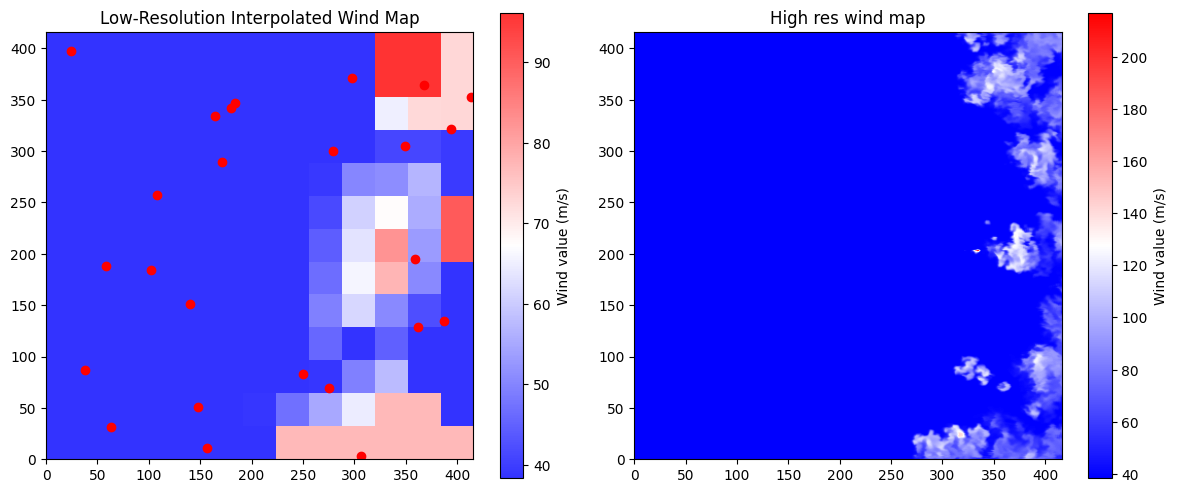

In [15]:
# Visualize the low-resolution interpolated wind map
plt.figure(figsize=(12, 5))
# Plot the interpolated values
plt.subplot(1, 2, 1)
plt.imshow(low_res[3].T, extent=(0, 416, 0, 416), origin='lower', cmap='bwr', alpha=0.8)
plt.colorbar(label='Wind value (m/s)')
plt.title('Low-Resolution Interpolated Wind Map')
plt.plot(sampling_coords[:, 0], sampling_coords[:, 1], 'ro')

# Plot the uncertainty (standard error)
plt.subplot(1, 2, 2)
plt.imshow(wind_map[3].T, extent=(0, 416, 0, 416), origin='lower', cmap='bwr')
plt.colorbar(label='Wind value (m/s)')
plt.title('High res wind map')

plt.tight_layout()
plt.show()

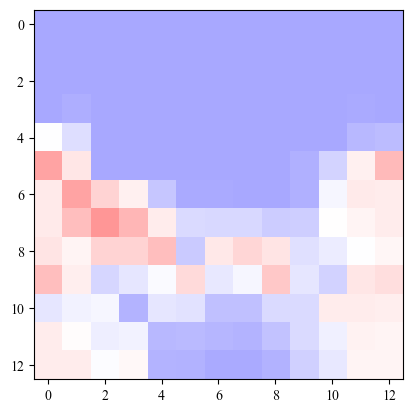

In [29]:
i=14
lowres=np.array(np.load(f"/home/availab-dl1/Sandboxes/Mohammad/FireWind-Dataset/FireWind_LowRes/10by10/X_train/{i}.npy"))[3]
plt.imshow(lowres, cmap='bwr',vmin=0,vmax=100)
# for (x, y) in regular_samples:
#     plt.plot(y, x, 'go')
# plt.title('Regular Grid Sampling')
# plt.xlabel('Field width')
# plt.ylabel('Field Lenght')
# plt.colorbar(label='Wind Velocity (m/s)')
plt.savefig(f'/home/availab-dl1/Downloads/lowres-T.png', dpi=140)
plt.show()